In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [46]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [47]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

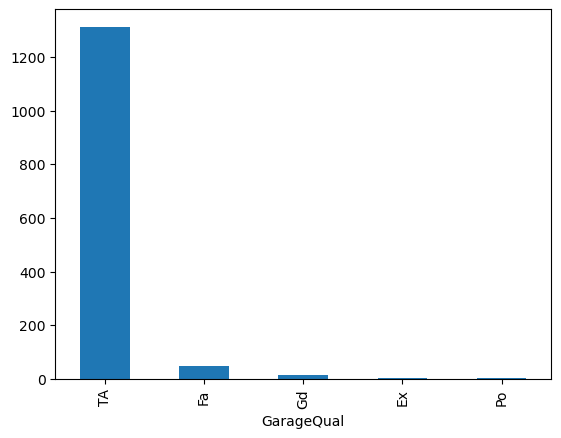

In [48]:
df['GarageQual'].value_counts().plot.bar()

In [49]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

In [50]:
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


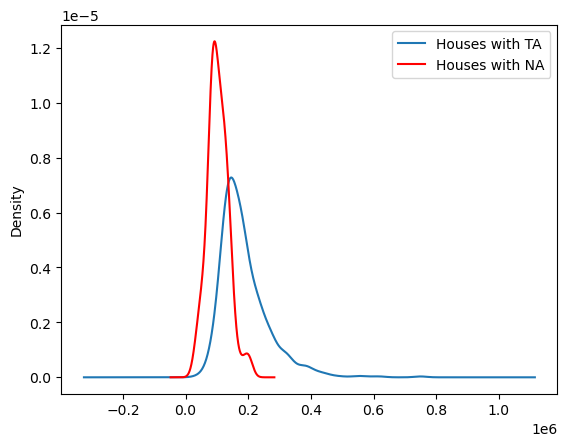

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual'] == "TA"]['SalePrice'].plot(kind='kde',ax=ax)                   ## TA der saleprice

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax , color="red")   ##NA der saleprice

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

### storing previous house TA value

In [52]:
prevTAHouse = df[df['GarageQual']=='TA']['SalePrice']    ##by born TA

In [53]:
mostFrq = df['GarageQual'].mode()
df['GarageQual'] = df['GarageQual'].fillna(mostFrq)
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


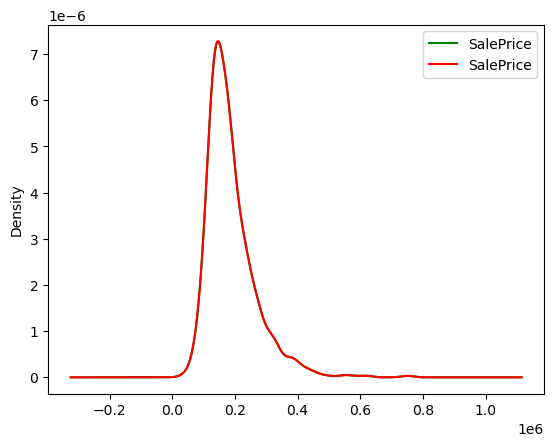

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111)

prevTAHouse.plot(kind='kde',ax=ax,color="green")                                 ##by born TA
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde',ax=ax,color="red")     ## mix(born + new)

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Fire-place column

<Axes: xlabel='FireplaceQu'>

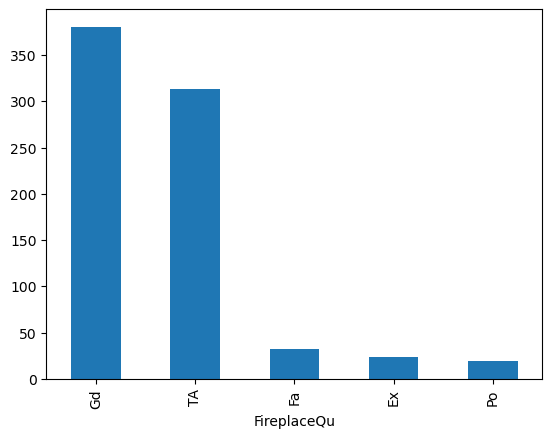

In [59]:
df['FireplaceQu'].value_counts().plot.bar()

In [61]:
mostFreqFire = df['FireplaceQu'].mode()
mostFreqFire

0    Gd
Name: FireplaceQu, dtype: object

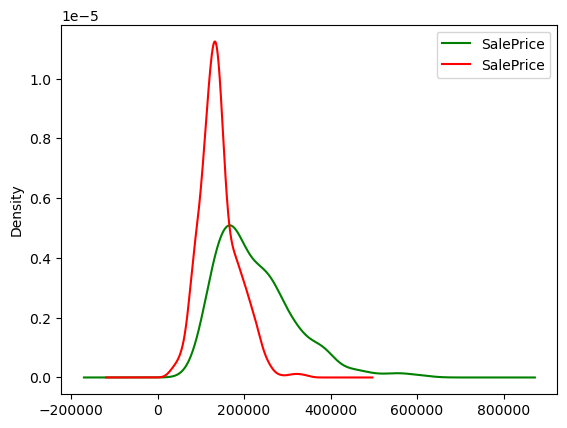

In [65]:
fig = plt.figure()

ax = fig.add_subplot(111)

df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde',ax=ax,color='green')
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [66]:
byBornGd = df[df['FireplaceQu'] == 'Gd']['SalePrice']

In [67]:
df['FireplaceQu'] = df['FireplaceQu'].fillna(mostFreqFire)

In [68]:
df

,FireplaceQu,GarageQual,SalePrice
0,Gd,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


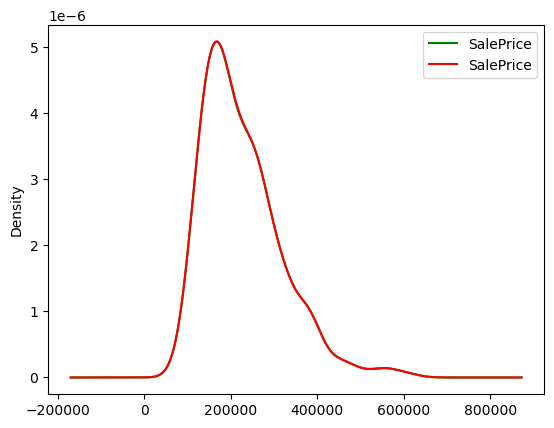

In [71]:
fig = plt.figure()

ax = fig.add_subplot(111)

byBornGd.plot(kind='kde',ax=ax,color='green')
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Using Sklear

In [72]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [73]:
X_train, X_test , y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.2,random_state=0)

In [75]:
trf = ColumnTransformer(transformers=[
    ('imp',SimpleImputer(strategy='most_frequent'),[0,1])
],remainder="passthrough")

In [76]:
X_train = trf.fit_transform(X_train)
X_test = trf.fit_transform(X_test)

In [77]:
X_train

array([['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ...,
       ['Gd', 'TA'],
       ['TA', 'TA'],
       ['Gd', 'TA']], dtype=object)